### Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Problem 1 Anomaly Detection  

In [ ]:
import pandas as pd
import random
import uuid
import time

def generate_fake_transaction_data(n=5000):
 data = []
 for _ in range(n):
    transaction_id = str(uuid.uuid4())
    sender = "0x" + ''.join(random.choices('abcdef0123456789', k=40))
    receiver = "0x" + ''.join(random.choices('abcdef0123456789', k=40))
    amount = round(random.uniform(0.001, 100), 4)
    timestamp = int(time.time()) - random.randint(1, 31536000)
    gas_fee = round(random.uniform(0.0001, 0.1), 6)
    transaction_count = random.randint(1, 500)
    wallet_age = random.randint(1, 365)

    # 10% Fraudulent Transactions
    is_fraud = 1 if (gas_fee > 0.05 and transaction_count > 300) or (amount > 80) else 0

    data.append([transaction_id, sender, receiver, amount, timestamp, gas_fee, transaction_count, wallet_age, is_fraud])

 df = pd.DataFrame(data, columns=["transaction_id", "sender_address", "receiver_address", "amount", "timestamp", "gas_fee",
"transaction_count", "wallet_age", "is_fraud"])
 df.to_csv("synthetic_transactions.csv", index=False)

generate_fake_transaction_data()

In [ ]:
df = pd.read_csv('synthetic_transactions.csv')
df.head()

,transaction_id,sender_address,receiver_address,amount,timestamp,gas_fee,transaction_count,wallet_age,is_fraud
0,8c52192f-7ce4-4d41-a4d3-258ccd244db0,0xa62276bc8e0a7f61207edab32ede4a4bd0a48d58,0xbceb15884eb5bc0ebd5fe0a6a92d8118c1b6d73a,71.0222,1739428570,0.091512,183,266,0
1,9877461a-c220-4f78-8229-9c4ca235fe56,0x17cb7a9e4d56b76f66b2a4833a05c19fb1ef1e50,0x4589efcd46c6a53b74690f44abf1ea27faf07217,55.0260,1714655370,0.045034,146,199,0
2,dc45a8fa-f623-49d2-bda7-7c4598ea2af9,0xb679196195a86086dc78883cc4ff29ab0e0be055,0xbd9aec9ceb80dd5566c922ad450ed48553bea678,19.3308,1720675143,0.088843,247,24,0
3,072d71b0-4587-4fca-8555-3f0352ba64a4,0x549529a067d3c7f37c2e4fd5c4cb0b1295732c8f,0xe46f5132bc77fe81a6672f3713b063d0b3de6bbe,0.5534,1720126264,0.074128,197,21,0
4,d28411ac-0163-4afc-97c0-40ed5d594330,0x75b1c39f4f3fdb250dda50f223e2c567368f3717,0xff6b0533a138c062f3d100ba48328a2f6cb0def3,77.4879,1718141814,0.032333,157,249,0


In [ ]:
print("Finding how many rows and columns are there",df.shape)

Finding how many rows and columns are there (5000, 9)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     5000 non-null   object 
 1   sender_address     5000 non-null   object 
 2   receiver_address   5000 non-null   object 
 3   amount             5000 non-null   float64
 4   timestamp          5000 non-null   int64  
 5   gas_fee            5000 non-null   float64
 6   transaction_count  5000 non-null   int64  
 7   wallet_age         5000 non-null   int64  
 8   is_fraud           5000 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 351.7+ KB


In [ ]:
print(f"Number of unique transaction id: {df['transaction_id'].nunique()}")
print(f"Number of unique sender addresses: {df['sender_address'].nunique()}")
print(f"Number of unique receiver addresses: {df['receiver_address'].nunique()}")

Number of unique transaction id: 5000
Number of unique sender addresses: 5000
Number of unique receiver addresses: 5000


In [ ]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,3222
1,1778


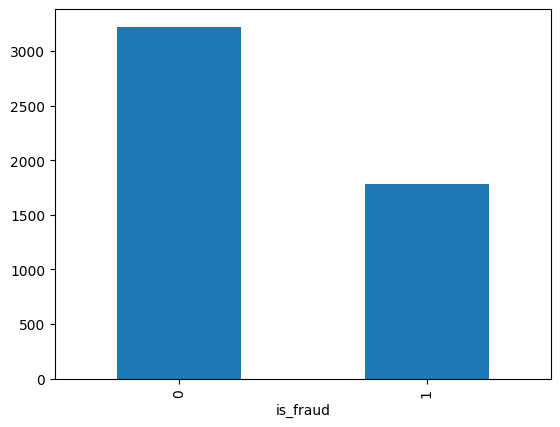

In [ ]:
df['is_fraud'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
data = df[['amount', 'timestamp', 'gas_fee', 'transaction_count', 'wallet_age', 'is_fraud']]

In [ ]:
data.head()

,amount,timestamp,gas_fee,transaction_count,wallet_age,is_fraud
0,71.0222,1739428570,0.091512,183,266,0
1,55.0260,1714655370,0.045034,146,199,0
2,19.3308,1720675143,0.088843,247,24,0
3,0.5534,1720126264,0.074128,197,21,0
4,77.4879,1718141814,0.032333,157,249,0


### Let's find outliers are present

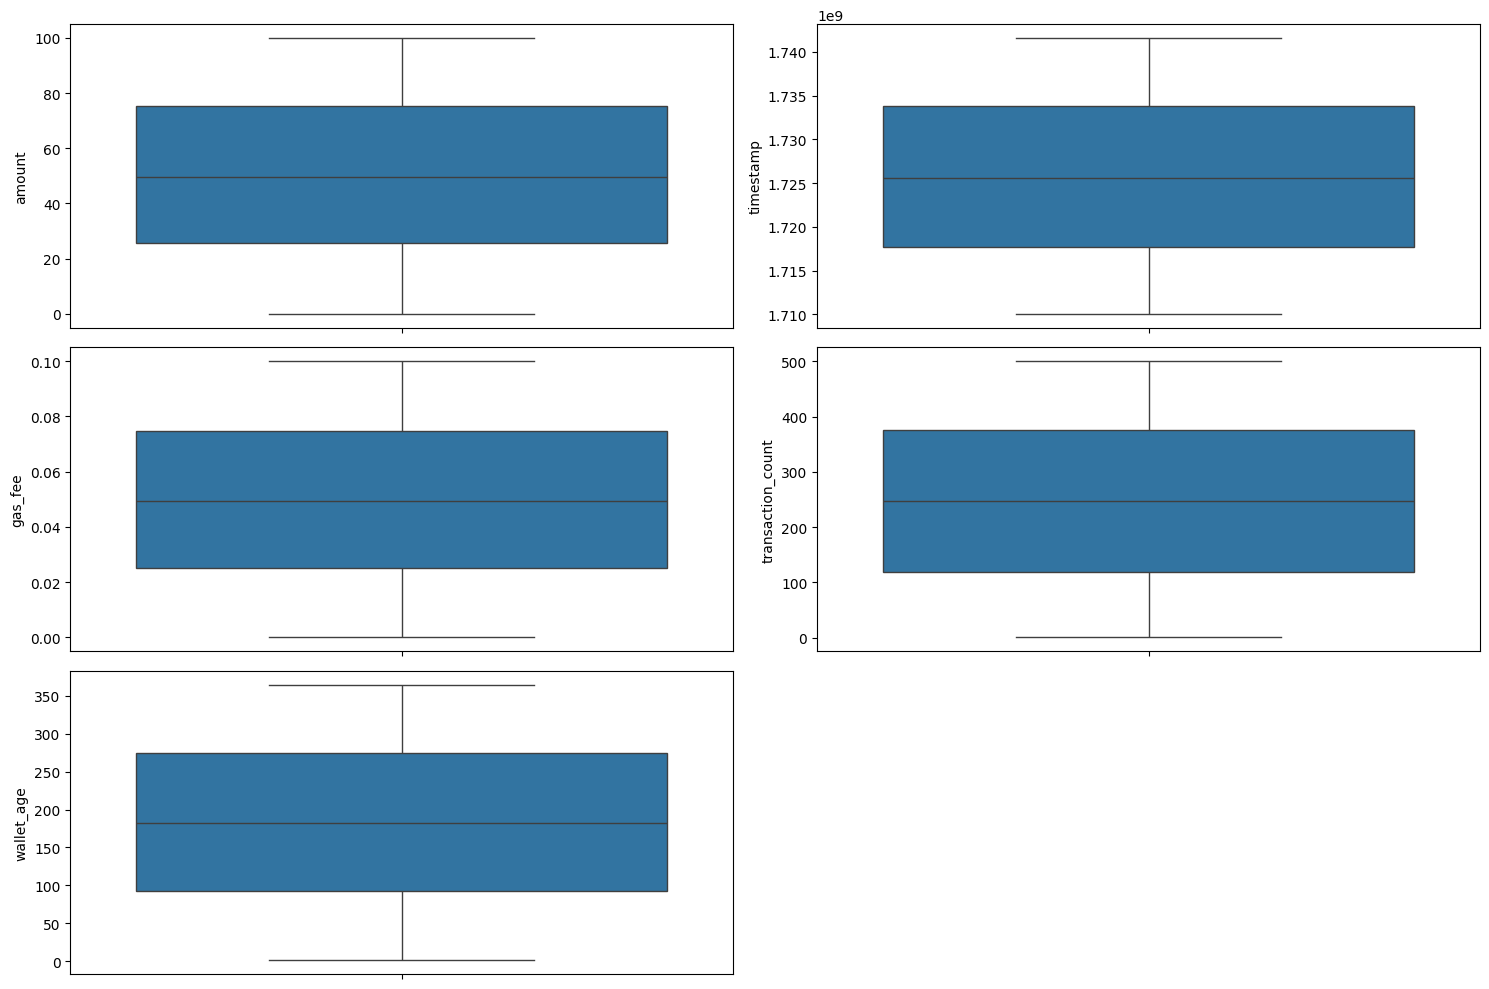

In [ ]:
#finding outliers are there are not

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for i, col in enumerate(['amount', 'timestamp', 'gas_fee', 'transaction_count', 'wallet_age']):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=data,y=col)
plt.tight_layout()
plt.show()


-> there are no outliers in data

In [ ]:
data

,amount,timestamp,gas_fee,transaction_count,wallet_age,is_fraud
0,71.0222,1739428570,0.091512,183,266,0
1,55.0260,1714655370,0.045034,146,199,0
2,19.3308,1720675143,0.088843,247,24,0
3,0.5534,1720126264,0.074128,197,21,0
4,77.4879,1718141814,0.032333,157,249,0
...,...,...,...,...,...,...
4995,47.1398,1741530822,0.019798,374,9,0
4996,76.4228,1740103625,0.083830,207,104,0
4997,54.6566,1718073096,0.045480,461,186,0
4998,89.0562,1739217326,0.072450,175,128,1


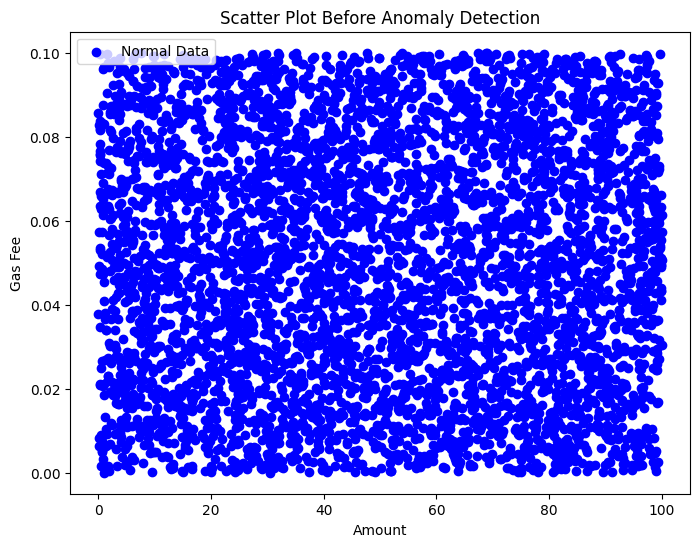

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df["amount"], df["gas_fee"], c='blue', label="Normal Data")
plt.xlabel("Amount")
plt.ylabel("Gas Fee")
plt.title("Scatter Plot Before Anomaly Detection")
plt.legend()
plt.show()

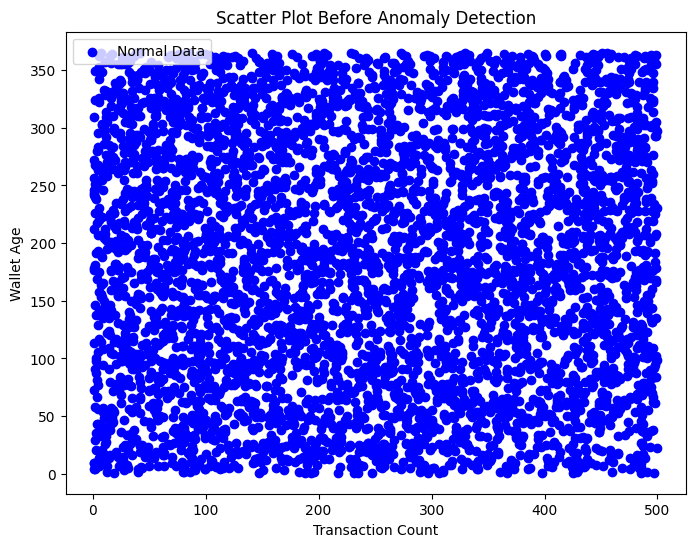

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df["transaction_count"], df["wallet_age"], c='blue', label="Normal Data")
plt.xlabel("Transaction Count")
plt.ylabel("Wallet Age")
plt.title("Scatter Plot Before Anomaly Detection")
plt.legend()
plt.show()

### Importing ML Packages and Alorithms

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Isolation Tree

-> Isolation Tree is a unsupervised machine learning algorithm that can be used to predict if a given datapoint is an outlier or not

In [ ]:
iso = ['amount', 'timestamp', 'gas_fee', 'transaction_count', 'wallet_age']
X_train = data[iso]
X_train.head()

,amount,timestamp,gas_fee,transaction_count,wallet_age
0,71.0222,1739428570,0.091512,183,266
1,55.0260,1714655370,0.045034,146,199
2,19.3308,1720675143,0.088843,247,24
3,0.5534,1720126264,0.074128,197,21
4,77.4879,1718141814,0.032333,157,249


In [ ]:
#Taking 100 Trees
#And Using 6 cores for faster training
#contamination = 0.05 means assuming there are 5% of outlier
iso_forest = IsolationForest(n_estimators=100, contamination=0.20, random_state=42)
data["anomaly"] = iso_forest.fit_predict(data[["amount", "gas_fee", "transaction_count", "wallet_age"]])

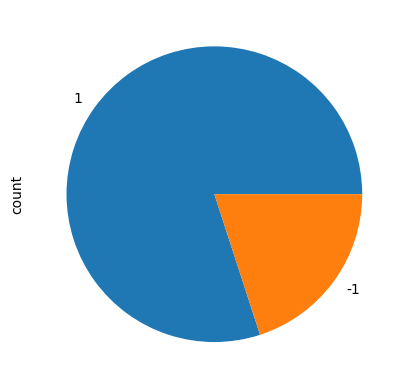

In [ ]:
#creating pie chart for visualize anomaly
data['anomaly'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
data['anomaly'].value_counts()

,count
anomaly,
1,4000
-1,1000


-> 1 means Normal datapoints
-> -1 means Outliers

In [ ]:
## Finding Index Numbers Where Outliers are found
index = data[data['anomaly'] == -1].index
index

Index([   3,    9,   17,   34,   38,   43,   54,   57,   61,   63,
       ...
       4933, 4946, 4950, 4953, 4963, 4966, 4969, 4984, 4989, 4999],
      dtype='int64', length=1000)

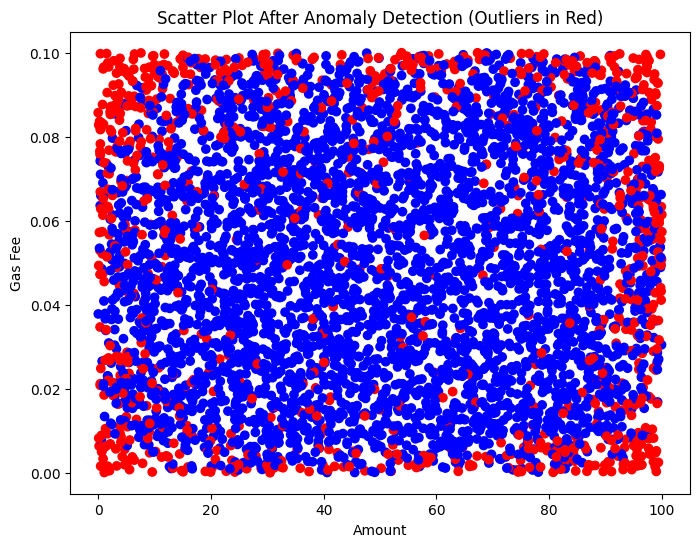

In [ ]:
plt.figure(figsize=(8,6))
colors = np.where(data["anomaly"] == -1, 'red', 'blue')  # Red for outliers
plt.scatter(data["amount"], data["gas_fee"], c=colors)
plt.xlabel("Amount")
plt.ylabel("Gas Fee")
plt.title("Scatter Plot After Anomaly Detection (Outliers in Red)")
plt.show()

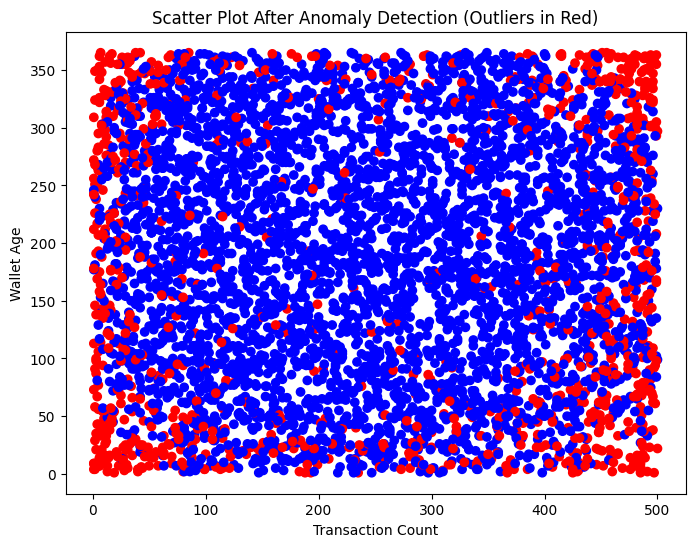

In [ ]:
plt.figure(figsize=(8,6))
colors = np.where(data["anomaly"] == -1, 'red', 'blue')  # Red for outliers
plt.scatter(data["transaction_count"], data["wallet_age"], c=colors)
plt.xlabel("Transaction Count")
plt.ylabel("Wallet Age")
plt.title("Scatter Plot After Anomaly Detection (Outliers in Red)")
plt.show()

### Observations

As i now i trained with 5000 datapoints so model predicted outliers ovelapping with normal points

### Train with less data points

In [ ]:
datapoints = data[['amount', 'timestamp', 'gas_fee', 'transaction_count', 'wallet_age']]

In [ ]:

# using sample we randomly taking 500 datapoints

sampled_data = datapoints.sample(n=500, random_state=42)

# and reset index
sampled_data.reset_index(drop=True)


,amount,timestamp,gas_fee,transaction_count,wallet_age,anomaly
0,84.8728,1736701475,0.086889,409,314,1
1,40.9783,1733265433,0.009770,364,356,1
2,67.4337,1712443171,0.023240,404,332,1
3,47.0499,1729599246,0.009396,91,138,1
4,39.2281,1719343772,0.075031,322,215,1
...,...,...,...,...,...,...
495,44.1566,1734726293,0.007329,169,3,1
496,40.6299,1740396378,0.057947,171,155,1
497,5.1234,1718438984,0.069561,492,219,-1
498,77.7994,1720563734,0.079587,236,19,1


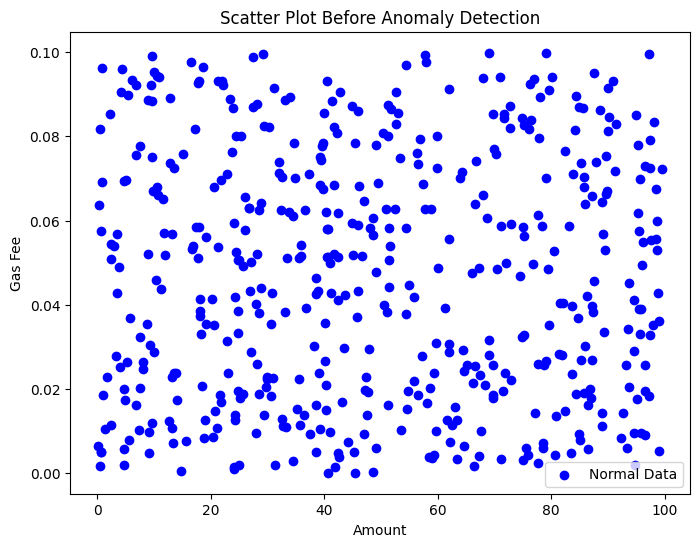

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(sampled_data["amount"], sampled_data["gas_fee"], c='blue', label="Normal Data")
plt.xlabel("Amount")
plt.ylabel("Gas Fee")
plt.title("Scatter Plot Before Anomaly Detection")
plt.legend()
plt.show()


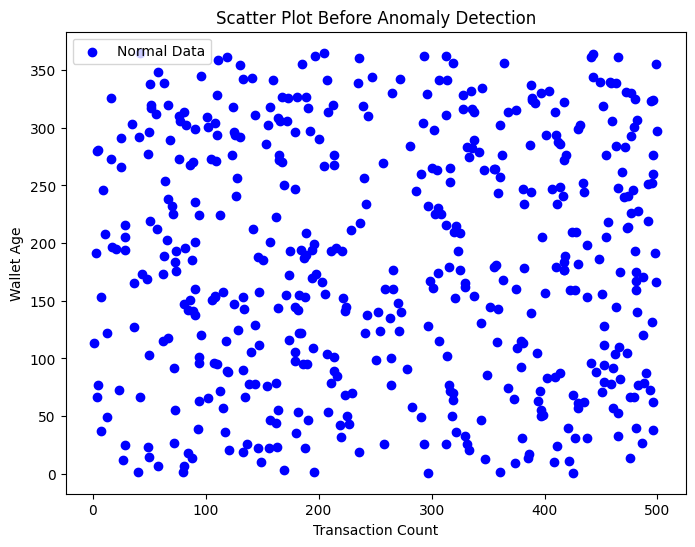

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(sampled_data["transaction_count"], sampled_data["wallet_age"], c='blue', label="Normal Data")
plt.xlabel("Transaction Count")
plt.ylabel("Wallet Age")
plt.title("Scatter Plot Before Anomaly Detection")
plt.legend()
plt.show()

In [ ]:
#Taking 100 Trees
#And Using 6 cores for faster training
#contamination = 0.10 means assuming there are 10% of outlier
iso_forest = IsolationForest(n_estimators=100, contamination=0.10, random_state=42)
sampled_data["anomaly"] = iso_forest.fit_predict(sampled_data[["amount", "gas_fee", "transaction_count", "wallet_age"]])

In [ ]:
sampled_data

,amount,timestamp,gas_fee,transaction_count,wallet_age,anomaly
1501,84.8728,1736701475,0.086889,409,314,1
2586,40.9783,1733265433,0.009770,364,356,1
2653,67.4337,1712443171,0.023240,404,332,1
1055,47.0499,1729599246,0.009396,91,138,1
705,39.2281,1719343772,0.075031,322,215,1
...,...,...,...,...,...,...
3928,44.1566,1734726293,0.007329,169,3,1
544,40.6299,1740396378,0.057947,171,155,1
367,5.1234,1718438984,0.069561,492,219,1
1612,77.7994,1720563734,0.079587,236,19,1


In [ ]:
# Convert anomaly predictions to 0 and 1 (to match ground truth format)
sampled_data["anomaly"] = sampled_data["anomaly"].apply(lambda x: 1 if x == -1 else 0)

sampled_data['true_anomaly'] = np.where(((sampled_data['gas_fee'] > 0.05) & (sampled_data['transaction_count'] > 300)) | (sampled_data['amount'] > 80), 1, 0)

# Now, use the newly created 'true_anomaly' column for y_true
y_true = sampled_data["true_anomaly"]
y_pred = sampled_data["anomaly"]

# Compute metrics
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Display results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.00
Recall: 0.00
F1-score: 0.00


In [ ]:
sampled_data['anomaly'].value_counts()

,count
anomaly,
1,450
-1,50


In [ ]:
## Finding Index Numbers Where Outliers are found
index = sampled_data[sampled_data['anomaly'] == -1].index
index

Index([1600, 3543,  486, 4842, 4866, 2570,  296,  763,  655, 3849, 4153, 1295,
        240, 1057, 4749, 2220, 4487, 3907, 3008, 3039, 2018, 4381, 3145,  999,
       3135,  653, 4520,  230, 4701, 3936, 1210, 2374, 3114, 4831, 1183,  555,
       3825,  670,  429, 4310, 4647, 1242, 2809, 2594, 3912, 2890, 1258, 3347,
         43, 3550],
      dtype='int64')

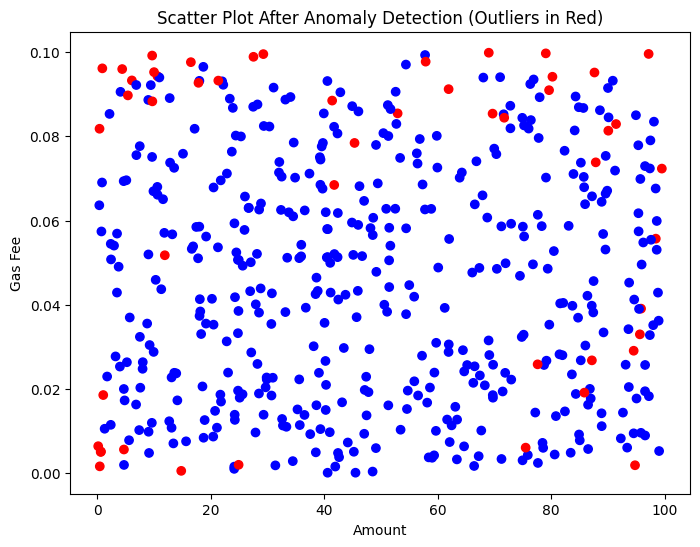

In [ ]:
plt.figure(figsize=(8,6))
colors = np.where(sampled_data["anomaly"] == -1, 'red', 'blue')  # Red for outliers
plt.scatter(sampled_data["amount"], sampled_data["gas_fee"], c=colors)
plt.xlabel("Amount")
plt.ylabel("Gas Fee")
plt.title("Scatter Plot After Anomaly Detection (Outliers in Red)")
plt.show()

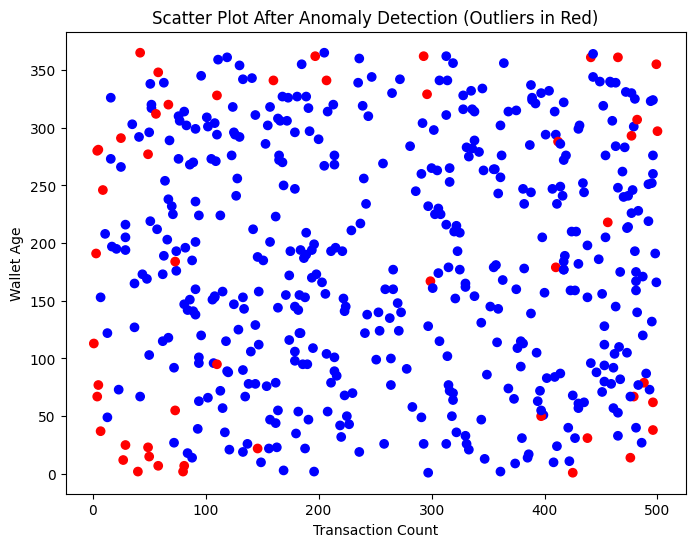

In [ ]:
plt.figure(figsize=(8,6))
colors = np.where(sampled_data["anomaly"] == -1, 'red', 'blue')  # Red for outliers
plt.scatter(sampled_data["transaction_count"], sampled_data["wallet_age"], c=colors)
plt.xlabel("Transaction Count")
plt.ylabel("Wallet Age")
plt.title("Scatter Plot After Anomaly Detection (Outliers in Red)")
plt.show()